<a href="https://colab.research.google.com/github/KJTechnologies/3-sections/blob/master/Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Predicting Udemy Course Popularity**

## Introduction:

In the era of online learning and digital education platforms, Udemy has emerged as a prominent destination for both instructors and learners. With thousands of courses available on a wide range of subjects, it has become essential for course creators and instructors to understand what makes a course popular and appealing to potential learners. To address this challenge, this project aims to leverage data analysis and visualization techniques to answer some of questions related to this learning platform.

The popularity of a course on Udemy is often determined by the number of subscribers, indicating the level of interest and engagement among learners. Accurately predicting course popularity is not only of interest to course creators and instructors but also to Udemy itself, which can use such predictions to improve recommendations and understand market trends.


The dataset under examination contains a wealth of data on online courses, encompassing 3,678 records, each with its own unique characteristics. Spanning a range of subjects, levels of expertise, and content durations, this dataset serves as a valuable resource for data analysis and visualization. In this analysis, the researcher will embark on a journey to uncover hidden insights within the dataset, guided by a series of pertinent questions.


In [1]:
#necessary libraries for this project

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(0)


In [2]:
# load dataset
df = pd.read_csv("/content/udemy_courses.csv")

In [3]:
# first five rows
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Based on the data, there are no missing values. One of the issue which need to be handled is ' published_timestamp' column which is encoded as object data type which should be in timestamp.

In [6]:
# convert from object to timestamp
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
# check if conversion was successful
df['published_timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: published_timestamp
Non-Null Count  Dtype              
--------------  -----              
3678 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 28.9 KB


**(1) What is the distribution of course levels in the dataset?**

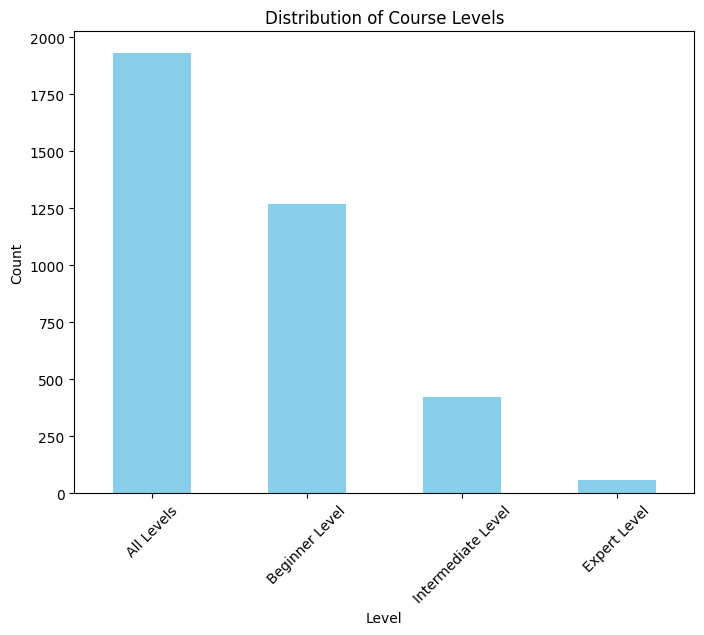

In [7]:

level_distribution = df['level'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
level_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Course Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

2. How does the number of subscribers correlate with course pricing?


Correlation Coefficient: 0.05


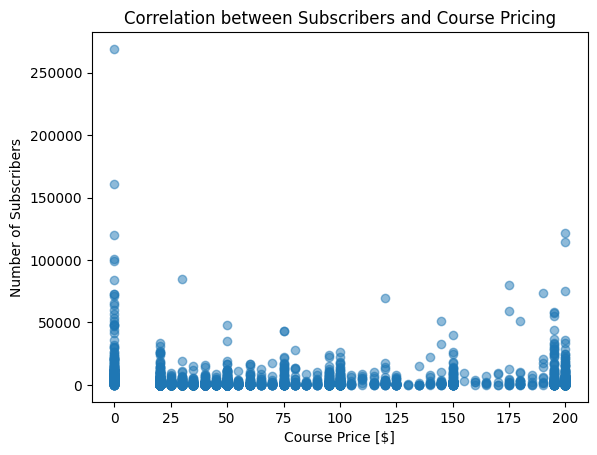

In [8]:
subscribers = df['num_subscribers']
prices = df['price']

#  a scatter plot showing relationship
plt.scatter(prices, subscribers, alpha=0.5)

# labels and a title to the chart
plt.xlabel('Course Price [$]')
plt.ylabel('Number of Subscribers')
plt.title('Correlation between Subscribers and Course Pricing')

# Calculates the correlation coefficient
correlation = np.corrcoef(prices, subscribers)[0, 1]
print(f'Correlation Coefficient: {correlation:.2f}')

# show plot
plt.show()

3. Which course boasts the highest number of subscribers, along with its title and price?

In [9]:
# sort dataframe(df) in descending order
sorted_df = df.sort_values(by='num_subscribers', ascending=False)
top_course = sorted_df.iloc[0]

title = top_course['course_title']
subscribers = top_course['num_subscribers']
price = top_course['price']

print(f"The course with the highest number of subscribers is '{title}' with {subscribers} subscribers and a price of ${price}.")

The course with the highest number of subscribers is 'Learn HTML5 Programming From Scratch' with 268923 subscribers and a price of $0.


4. Average Number of Subscribers by Course Level

In [10]:
# Group courses by level and calculate the average subscribers for each level.
level_subscribers = df.groupby('level')['num_subscribers'].mean().reset_index()

# Create an interactive bar chart with customizations.
fig = px.bar(
    level_subscribers,
    x='level',
    y='num_subscribers',
    labels={'num_subscribers': 'Average Number of Subscribers'},
    title='Average Number of Subscribers by Course Level',
    text='num_subscribers',  # Display the average number of subscribers on the bars.
    color_discrete_sequence=['#86bf91'],  # Custom color for the bars.
    hover_data={'num_subscribers': ':.0f'},  # Round off the labels to an integer.
)

# Customize the layout and appearance.
fig.update_layout(
    xaxis_title='Course Level',
    yaxis_title='Average Number of Subscribers',
    xaxis=dict(categoryorder='total descending'),  # Order the bars by total subscribers.
)

# Show the interactive plot.
fig.show()


5. Are there any trends or patterns in the data regarding the price of paid courses over time?

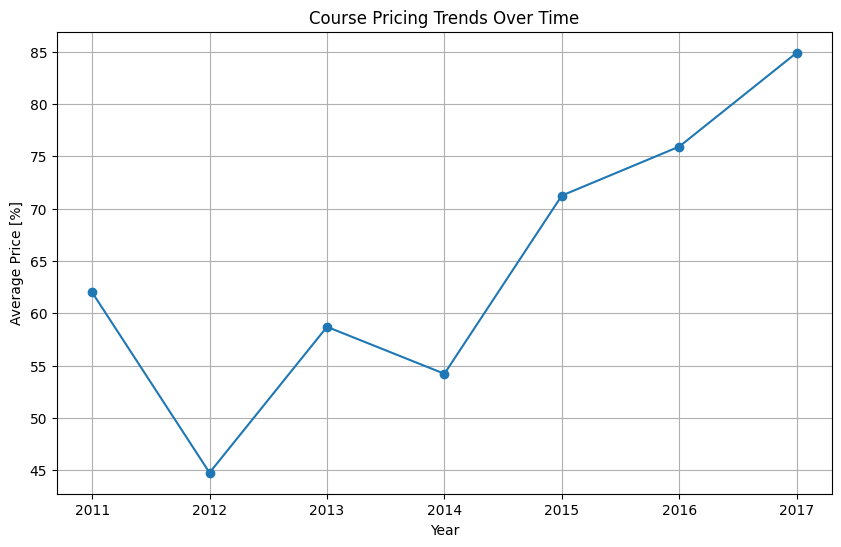

In [11]:
paid_courses = df[df['is_paid']]

# Convert the "published_timestamp" column to datetime.
paid_courses['published_timestamp'] = pd.to_datetime(paid_courses['published_timestamp'])

# Group by year and calculate average prices.
price_trends = paid_courses.groupby(paid_courses['published_timestamp'].dt.year)['price'].mean()

# Create a time series plot to visualize pricing trends.
plt.figure(figsize=(10, 6))
plt.plot(price_trends.index, price_trends.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price [%]')
plt.title('Course Pricing Trends Over Time')
plt.grid(True)
plt.show()

6. What are the most common course subjects or categories in the dataset?

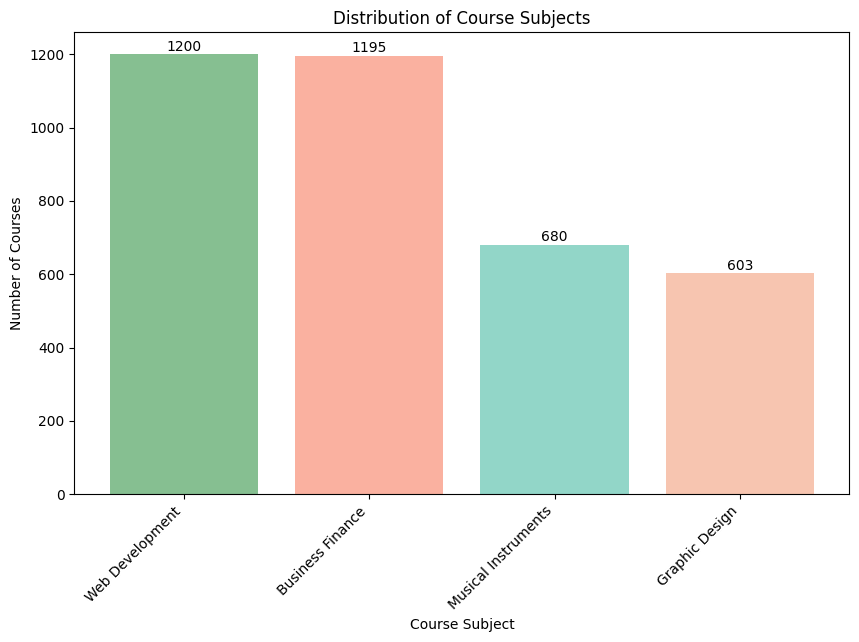

In [12]:
# Define colors for the bars.
colors = ['#86bf91', '#fab1a0', '#92d6c8', '#f7c5b0']

# Count the occurrences of each unique subject.
subject_counts = df['subject'].value_counts()

# Create a bar chart with appealing colors and labels.
plt.figure(figsize=(10, 6))
bars = plt.bar(subject_counts.index, subject_counts.values, color=colors)
plt.xlabel('Course Subject')
plt.ylabel('Number of Courses')
plt.title('Distribution of Course Subjects')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars.
for bar, count in zip(bars, subject_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 10, str(count), ha='center')

plt.show()

7. Is there a correlation between the course subject and the number of subscribers or course pricing?

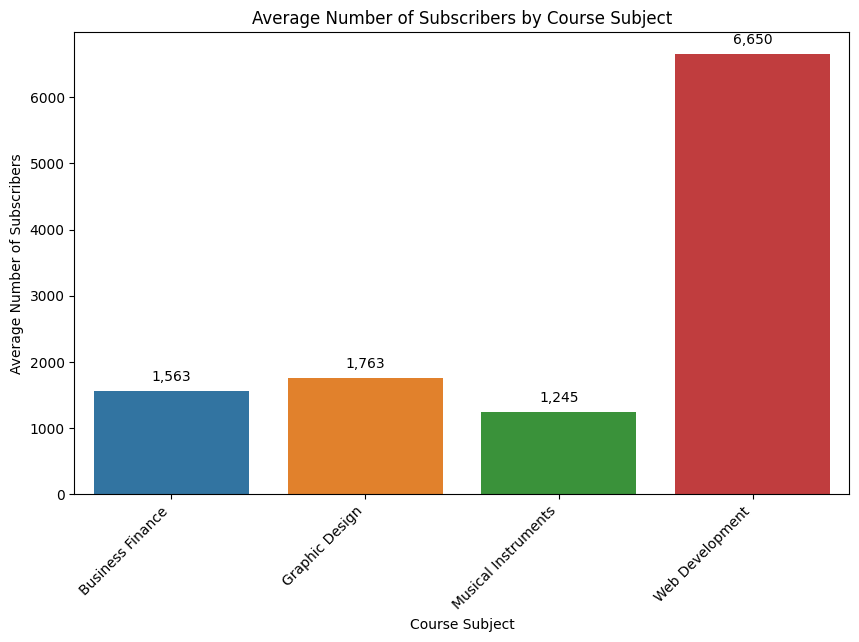

In [13]:
# Group courses by subject and calculate the average number of subscribers for each subject.
subject_subscribers = df.groupby('subject')['num_subscribers'].mean().reset_index()

# Create a bar chart with labels and a trend line.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=subject_subscribers, x='subject', y='num_subscribers')
plt.xlabel('Course Subject')
plt.ylabel('Average Number of Subscribers')
plt.title('Average Number of Subscribers by Course Subject')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')


plt.show()


8. Are there any seasonal trends in course subscriptions based on the published timestamps?

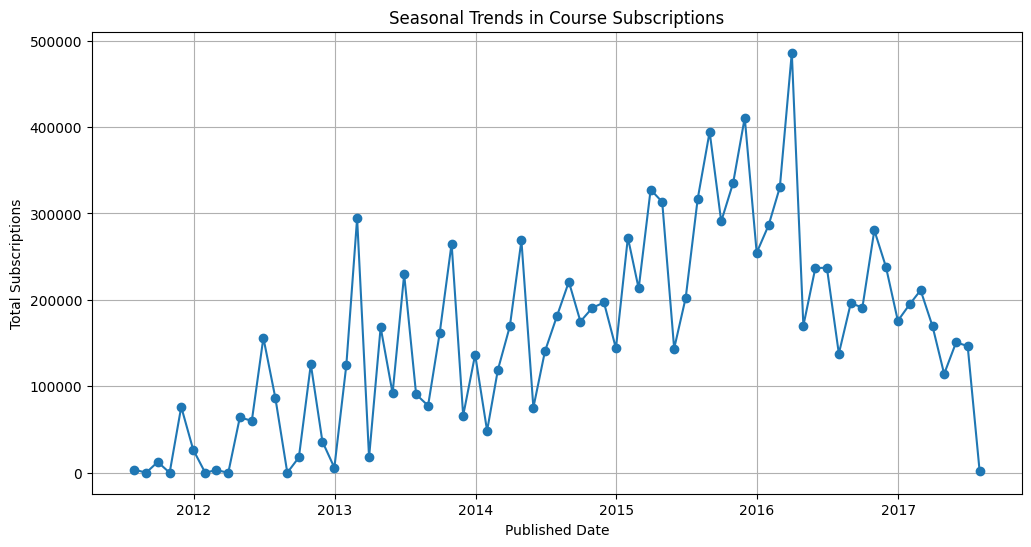

In [14]:
# Convert the "published_timestamp" column to datetime.
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

# Group by month and calculate the total number of subscriptions.
monthly_subscriptions = df.resample('M', on='published_timestamp')['num_subscribers'].sum()

# Create a time series plot to visualize seasonal trends.
plt.figure(figsize=(12, 6))
plt.plot(monthly_subscriptions.index, monthly_subscriptions.values, marker='o')
plt.xlabel('Published Date')
plt.ylabel('Total Subscriptions')
plt.title('Seasonal Trends in Course Subscriptions')

plt.grid(True)
plt.show()


9. What is the average course duration in different course subjects? Are certain subjects known for longer or shorter courses?

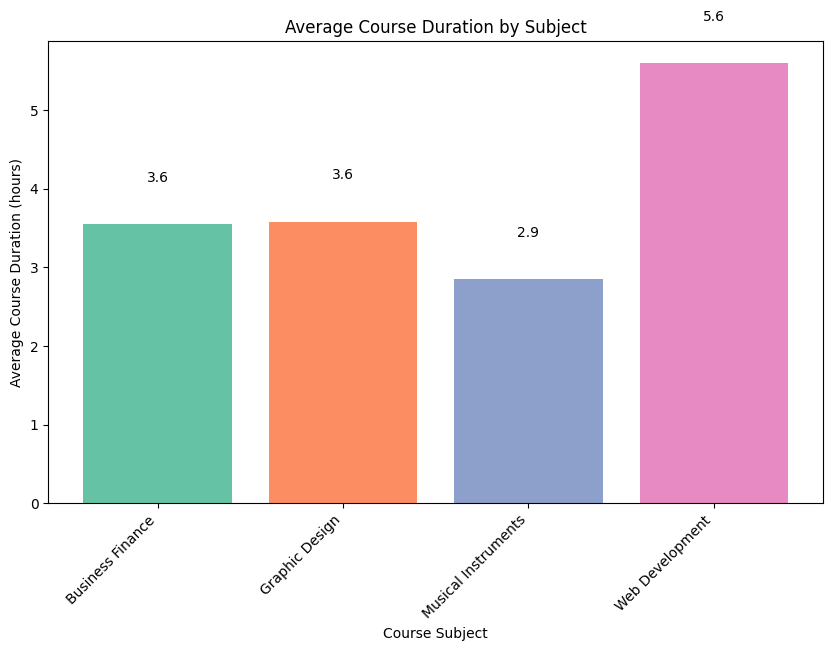

In [15]:
# Ensure numerical values for the relevant columns.
df['content_duration'] = pd.to_numeric(df['content_duration'], errors='coerce')

# Group courses by subject and calculate the average course duration.
subject_avg_duration = df.groupby('subject')['content_duration'].mean().reset_index()

# Define a custom color palette for the bars.
colors = sns.color_palette("Set2", n_colors=len(subject_avg_duration))

# Create a bar chart with Matplotlib.
plt.figure(figsize=(10, 6))
bars = plt.bar(subject_avg_duration['subject'], subject_avg_duration['content_duration'], color=colors)
plt.xlabel('Course Subject')
plt.ylabel('Average Course Duration (hours)')
plt.title('Average Course Duration by Subject')
plt.xticks(rotation=45, ha='right')

# Add labels and round off the values.
for bar, duration in zip(bars, subject_avg_duration['content_duration']):
    plt.text(bar.get_x() + bar.get_width() / 2., duration + 0.5, f'{duration:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()


10. Can we determine if there's a relationship between the number of lectures and the course duration?

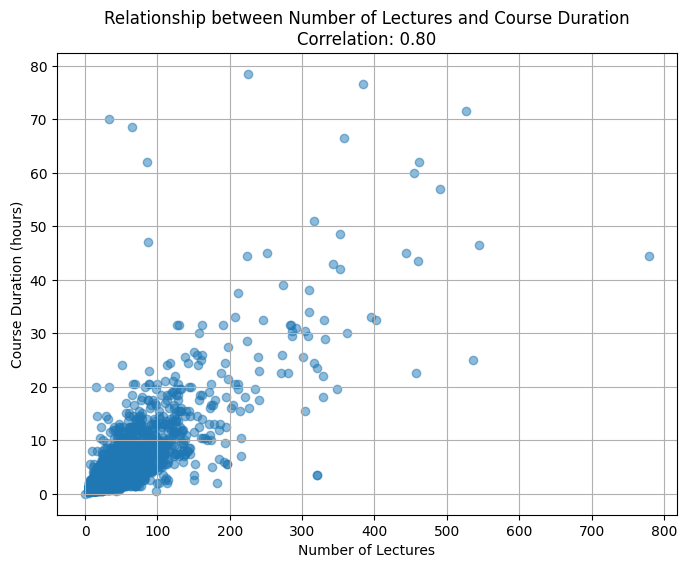

In [16]:
# Ensuring numerical values for the relevant columns.
df['num_lectures'] = pd.to_numeric(df['num_lectures'], errors='coerce')
df['content_duration'] = pd.to_numeric(df['content_duration'], errors='coerce')

# Calculate the Pearson correlation coefficient between the number of lectures and course duration.
correlation = df['num_lectures'].corr(df['content_duration'])

# Create a scatter plot to visualize the relationship (optional).
plt.figure(figsize=(8, 6))
plt.scatter(df['num_lectures'], df['content_duration'], alpha=0.5)
plt.xlabel('Number of Lectures')
plt.ylabel('Course Duration (hours)')
plt.title(f'Relationship between Number of Lectures and Course Duration\nCorrelation: {correlation:.2f}')
plt.grid(True)
plt.show()


11. Can we determine if there's a correlation between the number of subscribers and the number of reviews for courses?

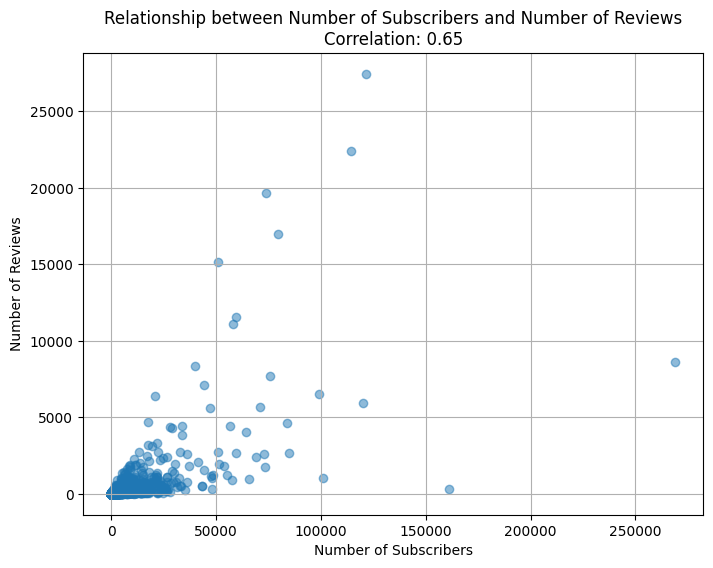

In [17]:
# Ensure numerical values for the relevant columns.
df['num_subscribers'] = pd.to_numeric(df['num_subscribers'], errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

# Calculate the Pearson correlation coefficient between the number of subscribers and number of reviews.
correlation = df['num_subscribers'].corr(df['num_reviews'])

# Create a scatter plot to visualize the relationship (optional).
plt.figure(figsize=(8, 6))
plt.scatter(df['num_subscribers'], df['num_reviews'], alpha=0.5)
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Reviews')
plt.title(f'Relationship between Number of Subscribers and Number of Reviews\nCorrelation: {correlation:.2f}')
plt.grid(True)
plt.show()


12. What is the distribution of the number of subscribers for paid and free courses, and can we compare their distributions?

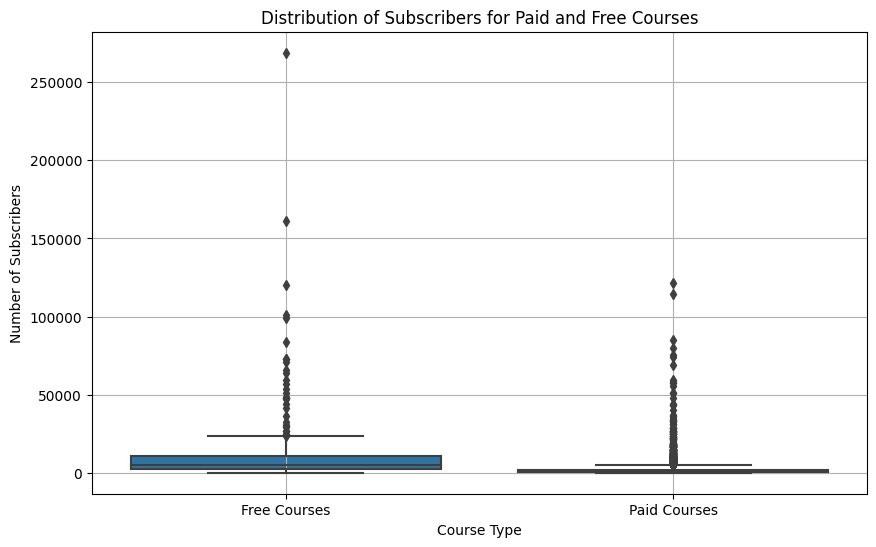

Average Subscribers (Paid Courses): 2429.81
Average Subscribers (Free Courses): 11533.95
Median Subscribers (Paid Courses): 734.50
Median Subscribers (Free Courses): 4869.50


In [18]:
# Categorize courses into paid and free.
paid_courses = df[df['is_paid']]
free_courses = df[~df['is_paid']]

# Ensure numerical values for the "num_subscribers" column.
paid_courses['num_subscribers'] = pd.to_numeric(paid_courses['num_subscribers'], errors='coerce')
free_courses['num_subscribers'] = pd.to_numeric(free_courses['num_subscribers'], errors='coerce')

# Calculate summary statistics.
paid_mean = paid_courses['num_subscribers'].mean()
free_mean = free_courses['num_subscribers'].mean()
paid_median = paid_courses['num_subscribers'].median()
free_median = free_courses['num_subscribers'].median()

# Create box plots to compare the distributions.
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_paid', y='num_subscribers', data=df)
plt.xlabel('Course Type')
plt.ylabel('Number of Subscribers')
plt.title('Distribution of Subscribers for Paid and Free Courses')
plt.xticks([0, 1], ['Free Courses', 'Paid Courses'])
plt.grid(True)
plt.show()

# Display summary statistics.
print(f"Average Subscribers (Paid Courses): {paid_mean:.2f}")
print(f"Average Subscribers (Free Courses): {free_mean:.2f}")
print(f"Median Subscribers (Paid Courses): {paid_median:.2f}")
print(f"Median Subscribers (Free Courses): {free_median:.2f}")
